## Example 9.
### Sensitivity of hydraulic head at a point to <font color='blue'>spatially uniform initial conditions</font> under transient flow conditions

## 0. Forward model
<br>
Governing equation:

$\begin{align}
\quad\quad K\ b\ \frac{\partial^2h}{\partial x^2}+R=S_s\ b\ \frac{\partial h}{\partial t}\cr
\cr\end{align}$

Boundary conditions:

$\begin{align}
\quad\quad h(x,t)=h_{\Gamma_{1_0}}\ ,\quad\quad\quad\quad\quad x=0=\Gamma_{1_0}\cr
\end{align}$

$\begin{align}
\quad\quad h(x,t)=h_{\Gamma_{1_L}}\ ,\quad\quad\quad\quad\quad x=L=\Gamma_{1_L}\cr
\cr\end{align}$

Initial conditions:

$\begin{align}
\quad\quad h(x,t)=h_0\ ,\quad\quad\quad\quad\quad\quad t=0\cr
\cr\end{align}$

Closed-form solution:

$\begin{align}
\quad\quad \rm{Not\ available}
\cr\cr\end{align}$

Spatial derivatives from differentiation:

$\begin{align}
\quad\quad \rm{Not\ available}
\cr\cr\end{align}$

In [16]:
from IPython.display import HTML, display
def set_background(color):
    script = (
        "var cell = this.closest('.code_cell');"
        "var editor = cell.querySelector('.input_area');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)").format(color)
    display(HTML('<img src onerror="{}">'.format(script)))

In [17]:
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)

import numpy as np

K, Ss, R, b, L, BC1h, ICh, ocol = 10., 1e-6, 1e-1/1000., 10., 10000., 0., 1., 5000
X = np.arange(L)

## 1. Direct sensitivity

$\begin{align}
\quad\quad\rm{Not\ available}
\cr\end{align}$

## 2. Perturbation sensitivity
$\begin{align}\cr
\frac{\partial h(x')}{\partial h_0}\approx\frac{h(x,h_0+\Delta h_0)-h(x,h_0)}{\Delta h_0}\;
\cr\cr\end{align}$

### 2a. Analytical

$\begin{align}
\quad\quad\rm{Not\ available}
\cr\end{align}$

### 2b. Semi-analytical

$\begin{align}
\quad\quad\rm{Not\ available}
\cr\end{align}$

### 2c. Numerical

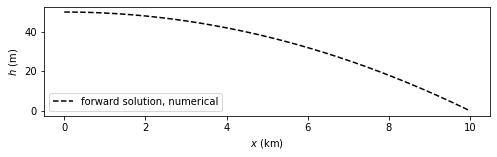

In [19]:
import flopy

dpar = 1e-4
nrow, ncol = 1, int(L)
M0 = flopy.modflow.Modflow(modelname='model', exe_name='../mf2005.exe')
flopy.modflow.ModflowDis(M0, nlay=1, nrow=nrow, ncol=ncol, nper=2, delr=1., delc=1., top=0., botm=-b,
                         steady=[True,False], perlen=[1., 1.], nstp=[1, 1])
flopy.modflow.ModflowBas(M0, ibound=np.hstack([np.ones([nrow, ncol-1]), -1*np.ones([1,1])]), 
                         strt=np.hstack([ICh*np.ones([nrow, ncol-1]), np.zeros([1,1])]))
flopy.modflow.ModflowLpf(M0, hk=K, vka=-999., ss=Ss, sy=-999., ipakcb=53)
flopy.modflow.ModflowRch(M0, nrchop=1, rech={0:R, 1:R}, ipakcb=53)
flopy.modflow.ModflowPcg(M0, hclose=1e-6, rclose=1e-6)
flopy.modflow.ModflowOc(M0, stress_period_data={(0,0): ['save head', 'save budget'], (1,0): ['save head', 'save budget']})
M0.write_input()
success, buff = M0.run_model(silent=True)
H0 = flopy.utils.binaryfile.HeadFile('model.hds').get_data(kstpkper=[0,1])[0,0,:]
dhdt = np.ravel(flopy.utils.binaryfile.HeadFile('model.hds').get_data(kstpkper=[0,1]))-\
       np.ravel(flopy.utils.binaryfile.HeadFile('model.hds').get_data(kstpkper=[0,0]))

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.subplots(figsize=[8,2])
plt.plot(X/1000., H0, 'k--', mfc='none', label='forward solution, numerical')
plt.xlabel('$x$ (km)')
plt.ylabel('$h$ (m)')
plt.legend(loc=3);

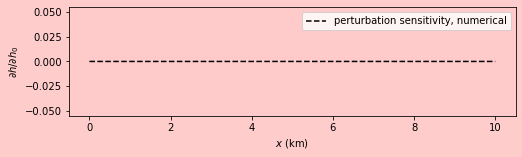

In [22]:
M1 = M0
flopy.modflow.ModflowBas(M1, ibound=np.hstack([np.ones([nrow, ncol-1]), -1*np.ones([1,1])]), 
                         strt=np.hstack([ICh+ICh*dpar*np.ones([nrow, ncol-1]), np.zeros([1,1])]))
M1.write_input()
success, buff = M1.run_model(silent=True)
H1 = flopy.utils.binaryfile.HeadFile('model.hds').get_data(kstpkper=[0,1])[0,0,:]
dhdICh = (H1-H0)/(ICh*dpar)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
f,s = plt.subplots(figsize=[8,2])
plt.plot(X/1000., dhdICh, 'k--', mfc='none', label='perturbation sensitivity, numerical')
plt.xlabel('$x$ (km)')
plt.ylabel(r'$\partial h / \partial h_0$')
plt.legend()
f.patch.set_facecolor((1.0, 0.0, 0.0, 0.2))
s.set_facecolor((1.0, 0.0, 0.0, 0.01));

In [20]:
set_background('rgba(200, 0, 0, 0.2)')
print('%.6f'% dhdICh[ocol])

0.000000


## 3. Adjoint sensitivity

<br>
    
$\begin{align}
\quad\quad \frac{\partial h(x')}{\partial h_0}=\int\limits_X\psi^*_1(x,0)\ S_s\; dx
\cr\end{align}$

Governing equation:

$\begin{align}
\quad\quad K\ b\ \frac{\partial\psi^*_1}{\partial x}+\frac{1}{2\ K\ b}\delta(x-x')=S_s\ b\ \frac{\partial \psi^*_1}{\partial t}\cr
\cr\end{align}$

Boundary conditions:

$\begin{align}
\quad\quad \psi^*_1(x,t)=0\ ,\quad\quad\quad\quad\quad x=0=\Gamma_{1_0}\cr
\end{align}$

$\begin{align}
\quad\quad \psi^*_1(x,t)=0\ ,\quad\quad\quad\quad\quad x=L=\Gamma_{1_L}\cr
\cr\end{align}$

Terminal conditions:

$\begin{align}
\quad\quad \psi^*_1(x,t)=0\ ,\quad\quad\quad\quad\quad t=t_{final}\cr
\cr\end{align}$

Closed-form solution:

$\begin{align}
\quad\quad\rm{Not\ available}
\cr\end{align}$

### 3a. Analytical

$\begin{align}
\quad\quad\rm{Not\ available}
\cr\end{align}$

### 3b. Semi-analytical

$\begin{align}
\quad\quad\rm{Not\ available}
\cr\end{align}$

### 3c. Numerical

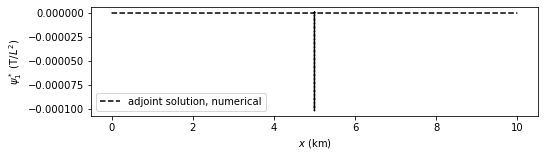

In [30]:
M0 = flopy.modflow.Modflow(modelname='model', exe_name='../mf2005.exe')
flopy.modflow.ModflowDis(M0, nlay=1, nrow=1, ncol=ncol, nper=2, delr=1., delc=1., top=0., botm=-b, steady=False, 
                         perlen=1., nstp=1)
flopy.modflow.ModflowBas(M0, ibound=np.hstack([np.ones([nrow, ncol-1], dtype=int), -1*np.ones([1,1])]), 
                         strt=BC1h*np.ones([nrow, ncol], dtype=float))
flopy.modflow.ModflowLpf(M0, hk=K, vka=-999., ss=-999., sy=-999., ipakcb=53)
flopy.modflow.ModflowWel(M0, stress_period_data={0: [0, 0, ocol, 1.]})
flopy.modflow.ModflowPcg(M0, hclose=1e-6, rclose=1e-6)
flopy.modflow.ModflowOc(M0, stress_period_data={(0,0): ['save head', 'save budget']})
M0.write_input()
success, buff = M0.run_model(silent=True)
A = flopy.utils.binaryfile.HeadFile('model.hds').get_data()[0,0,:]

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.subplots(figsize=[8,2])
plt.plot(X/1000., A, 'k--', mfc='none', label='adjoint solution, numerical')
plt.xlabel('$x$ (km)')
plt.ylabel(r'$\psi^*_1$ (T/$L^2$)')
plt.legend();

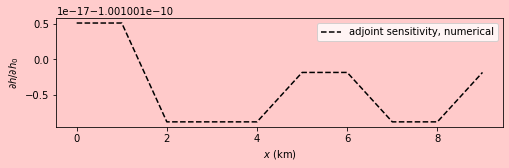

In [27]:
dhdICh = np.empty(0)
for oc,xp in enumerate(X[::1000]):
    M1 = M0
    flopy.modflow.ModflowWel(M1, stress_period_data={0: [0, 0, oc, 1.]})
    M1.write_input()
    success, buff = M1.run_model(silent=True)
    A = flopy.utils.binaryfile.HeadFile('model.hds').get_data()[0,0,:]
    dhdICh = np.append(dhdICh, np.sum(A*Ss))

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
f,s = plt.subplots(figsize=[8,2])
plt.plot(X[::1000]/1000., dhdICh, 'k--', mfc='none', label='adjoint sensitivity, numerical')
plt.xlabel('$x$ (km)')
plt.ylabel(r'$\partial h / \partial h_0$')
plt.legend()
f.patch.set_facecolor((1.0, 0.0, 0.0, 0.2))
s.set_facecolor((1.0, 0.0, 0.0, 0.01));

In [28]:
set_background('rgba(200, 0, 0, 0.2)')
print('%.6f'% dhdICh[int(np.where(X[::1000]==float(ocol))[0])])

-0.000000
